In [47]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [48]:
df = pd.read_csv("resources/heart_attack_prediction_dataset 2.csv")
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Data Exploration

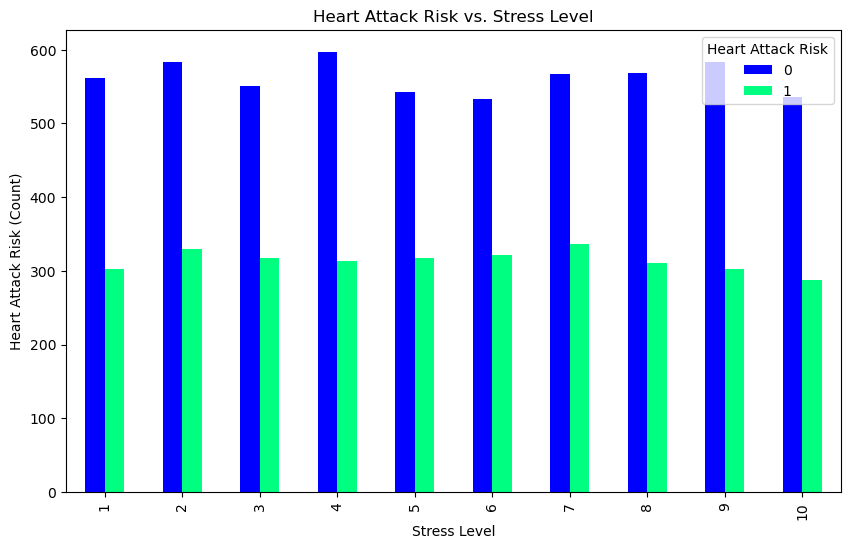

In [49]:
heart_by_stress = df.groupby('Stress Level')['Heart Attack Risk'].value_counts().unstack()

heart_by_stress.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs. Stress Level.png")
plt.show()

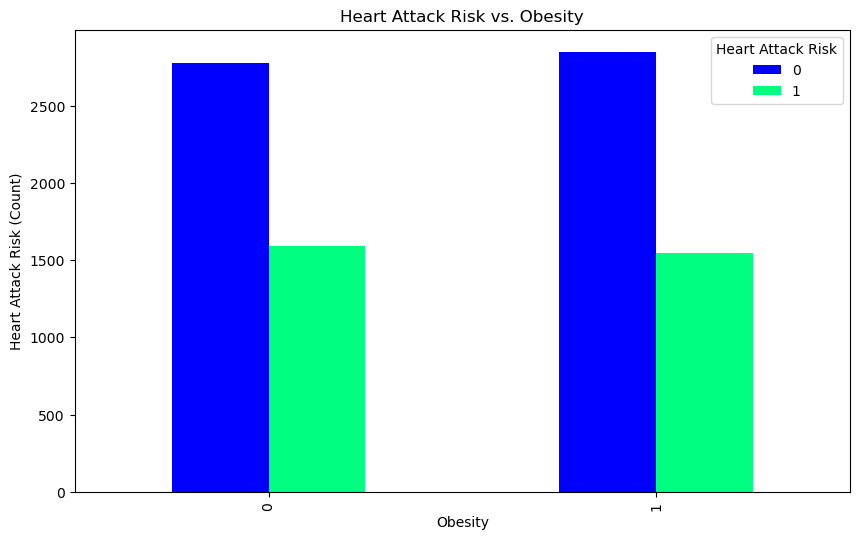

In [50]:
heart_by_obesity = df.groupby(['Obesity', 'Heart Attack Risk']).size().unstack()

heart_by_obesity.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Obesity')
plt.xlabel('Obesity')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs. Obesity.png")
plt.show()

In [51]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

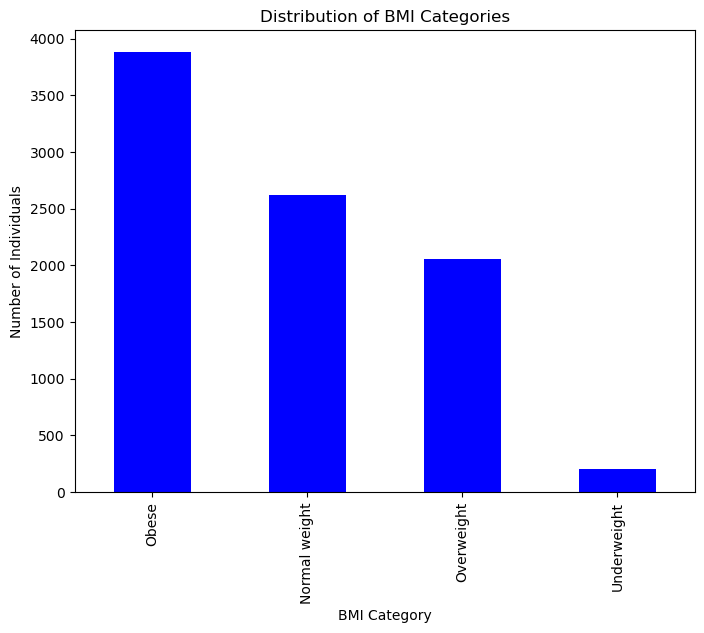

In [52]:
df['BMI Category'] = df['BMI'].apply(categorize_bmi)

bmi_category_counts = df['BMI Category'].value_counts()

plt.figure(figsize=(8, 6))
bmi_category_counts.plot(kind='bar', colormap='winter')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Number of Individuals')
plt.savefig("BMI_Distribution.png")
plt.show()

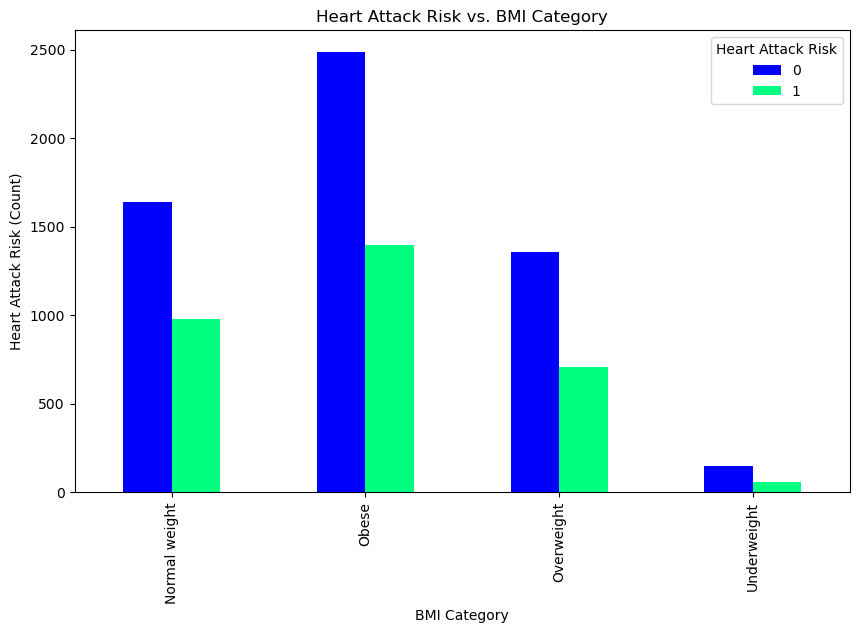

In [53]:
heart_attack_risk_by_bmi_category = df.groupby(['BMI Category', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_bmi_category.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs BMI.png")
plt.show()

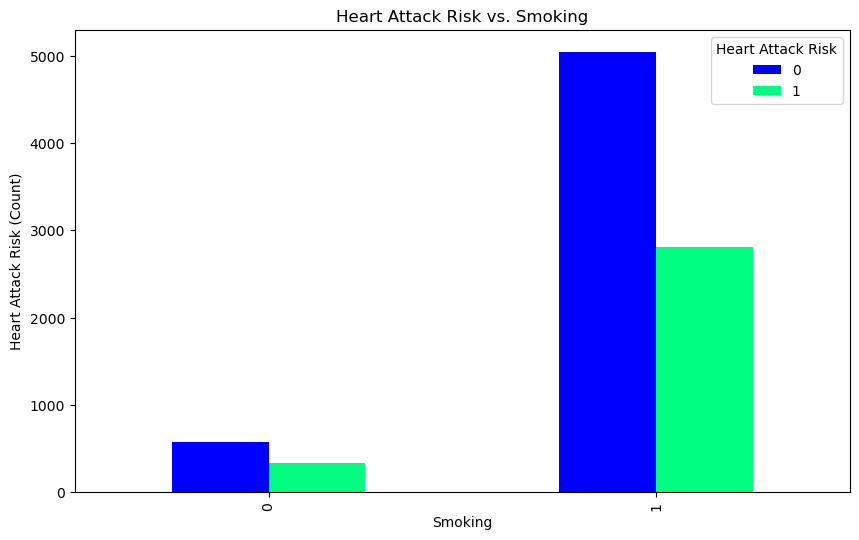

In [54]:
heart_attack_risk_by_smoking = df.groupby(['Smoking', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_smoking.plot(kind='bar', figsize=(10, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Smoking')
plt.xlabel('Smoking')
plt.ylabel('Heart Attack Risk (Count)')
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart Attack Risk vs Smokin.png")
plt.show()

In [55]:
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 110, 10), right=False)

age_group_counts = df.groupby('Age Group').size()

print(age_group_counts)

Age Group
[0, 10)         0
[10, 20)      251
[20, 30)     1251
[30, 40)     1225
[40, 50)     1201
[50, 60)     1156
[60, 70)     1203
[70, 80)     1134
[80, 90)     1190
[90, 100)     152
dtype: int64


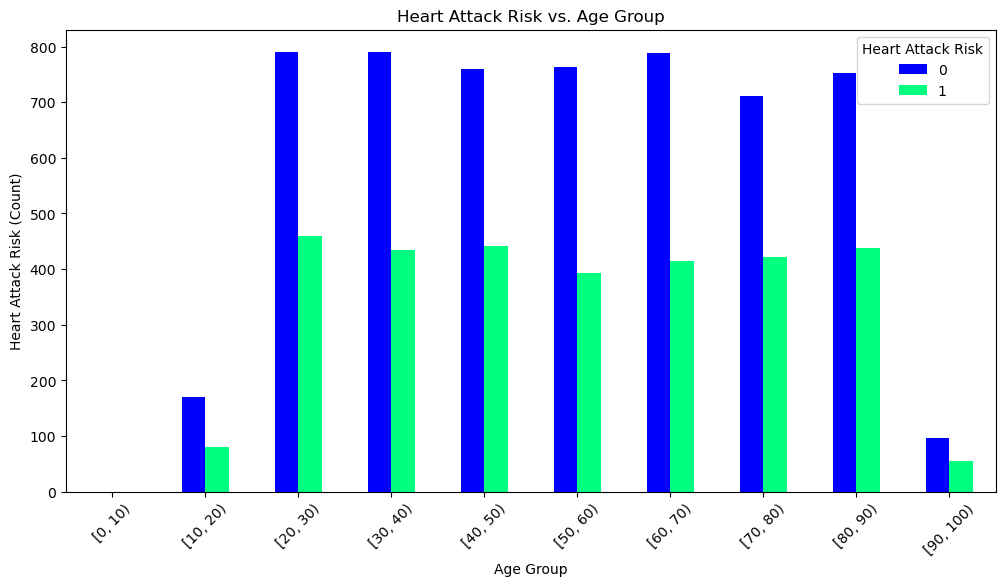

In [56]:
heart_attack_risk_by_age_group = df.groupby(['Age Group', 'Heart Attack Risk']).size().unstack(fill_value=0)

heart_attack_risk_by_age_group.plot(kind='bar', figsize=(12, 6), colormap='winter')
plt.title('Heart Attack Risk vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Risk (Count)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Heart Attack Risk')
plt.savefig("Heart_Attack_Risk_vs_Age_Group.png")
plt.show()

### Data Cleaning

In [57]:
# Split the 'Blood Pressure' column into 'Systolic' and 'Diastolic'
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# Drop the original 'Blood Pressure' column
df.drop(columns=['Blood Pressure'], inplace=True)

In [58]:
df.drop(columns=['Patient ID'], inplace=True)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])
df['Diet'] = label_encoder.fit_transform(df['Diet'])
#df = pd.get_dummies(df, columns=['Country', 'Continent','Hemisphere'], drop_first=True)
df = df.drop(columns=['Country', 'Continent','Hemisphere'])

In [59]:
X = df.drop('Heart Attack Risk', axis = 1)
y = df['Heart Attack Risk']

/var/folders/44/b8261lv57136y15mwmjzj7kc0000gn/T/ipykernel_75219/2690260473.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


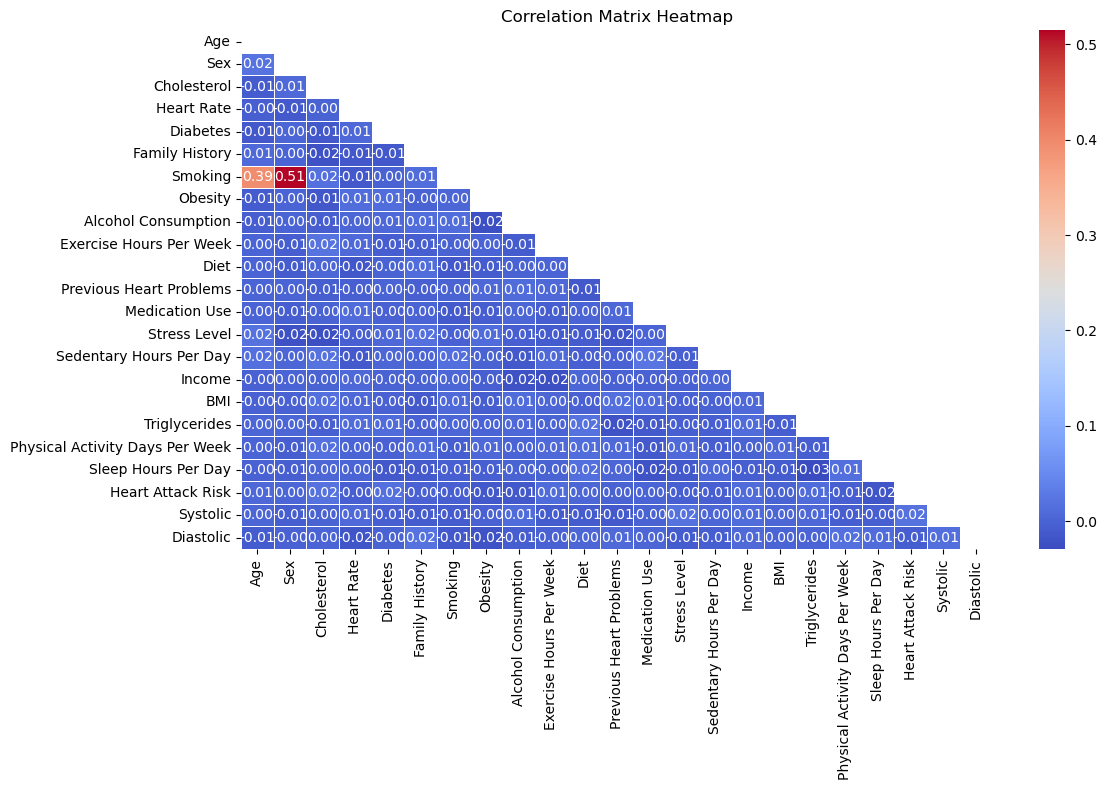

In [60]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
# Mask the upper side
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Create heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### Utility Functions

In [61]:
def evaluate_model_and_add_predictions(model, X_train, X_test, y_train, y_test, df):
    """
    Evaluates a model's performance and adds predictions to the dataframe
    
    Parameters:
    -----------
    model : sklearn model object
        The machine learning model to evaluate
    X_train : array-like
        Training features
    X_test : array-like
        Test features
    y_train : array-like
        Training target
    y_test : array-like
        Test target
    df : pandas DataFrame
        Original dataframe to add predictions to
    
    Returns:
    --------
    dict : Dictionary containing model performance metrics
    """
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get predictions for train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    # Get predictions for full dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Using all features from X
    predictions = model.predict(X_scaled)
    
    # Add predictions to dataframe
    df['Predicted_Risk'] = predictions
    
    # Add prediction probabilities if model supports it
    if hasattr(model, 'predict_proba'):
        prediction_proba = model.predict_proba(X_scaled)
        df['Risk_Probability'] = prediction_proba[:, 1]
    

    
    # Get confusion matrix and classification report
    conf_matrix = confusion_matrix(df['Heart Attack Risk'], df['Predicted_Risk'])
    class_report = classification_report(df['Heart Attack Risk'], df['Predicted_Risk'])
    
    # Return metrics dictionary
    return {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'f1_score': test_f1_score,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }


### Model Creation

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Overweight'

/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mati/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model Comparison:
              Model  Training Accuracy  Test Accuracy  F1 Score
Logistic Regression              0.640          0.646     0.000
      Decision Tree              1.000          0.550     0.358
      Random Forest              1.000          0.641     0.046
                SVM              0.647          0.646     0.003
                KNN              0.709          0.578     0.308
  Gradient Boosting              0.665          0.639     0.034
            XGBoost              0.988          0.594     0.281


Text(0.5, 1.0, 'Model Performance Comparison')

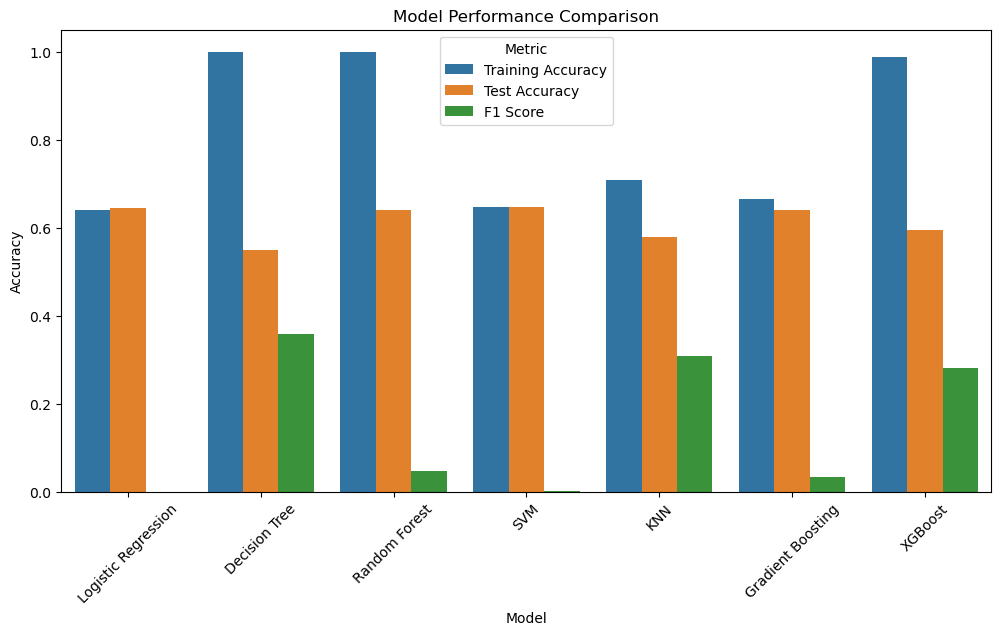

In [34]:
# Create a results dataframe
def create_results_df(model_metrics, model_name):
    """
    Creates a row of results for the metrics dataframe
    """
    return pd.DataFrame({
        'Model': [model_name],
        'Training Accuracy': [model_metrics['train_accuracy']],
        'Test Accuracy': [model_metrics['test_accuracy']],
        'F1 Score': [model_metrics['f1_score']],
    })

# Initialize empty results dataframe
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Test Accuracy', 'F1 Score'])

# Test different models and add results to dataframe
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),

}

for model_name, model in models.items():
    # Get metrics for this model
    metrics = evaluate_model_and_add_predictions(
        model,
        X_train,
        X_test,
        y_train,
        y_test,
        df,
    )
    
    # Add results to dataframe
    model_results = create_results_df(metrics, model_name)
    results_df = pd.concat([results_df, model_results], ignore_index=True)

# Display formatted results
print("\nModel Comparison:")
print(results_df.round(3).to_string(index=False))

# Optional: Create a bar plot of the results
plt.figure(figsize=(12, 6))
results_melted = results_df.melt(id_vars=['Model'], var_name='Metric', value_name='Accuracy')
sns.barplot(x='Model', y='Accuracy', hue='Metric', data=results_melted)
plt.xticks(rotation=45)
plt.title('Model Performance Comparison')